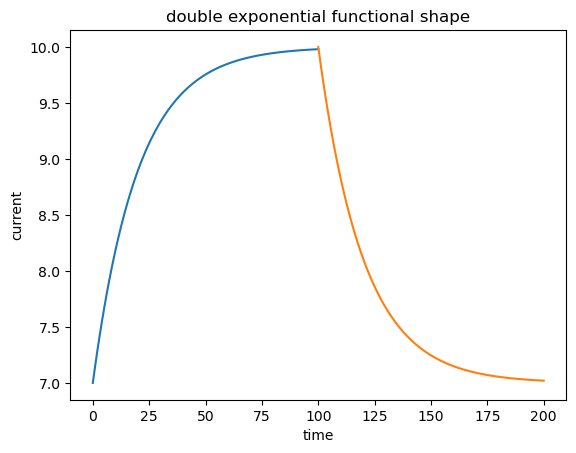

In [1]:
import numpy as np
from model_function import *
t_100 = np.linspace(0,100,100)
t_200 =  np.linspace(100, 200, 100)
A1 = -1
A2= -2
t1 = 20
t2= 20
toff1 = 0
toff2 = -100
j0 = 10

y = double_exponential_function(t_100, A1, A2, t1, t2, toff1, toff1, j0)
y2 = double_exponential_function(t_200, -A1,- A2, t1, t2, toff2, toff2, j0-3)
plt.plot(t_100,y)
plt.plot(t_200,y2)
plt.xlabel('time')
plt.ylabel('current')
plt.title('double exponential functional shape')
#plt.savefig('function_model.pdf')
plt.show()